# Import Libraries

In [26]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt

import quandl as qdl
import yfinance as yf
import investpy as ip


# Load Data

In [6]:
df = ip.get_crypto_historical_data(crypto='bitcoin', from_date='01/01/2018', to_date = '28/12/2021' )
print(df.head())

               Open     High      Low    Close  Volume Currency
Date                                                           
2018-01-01  13850.5  13921.5  12877.7  13444.9   78425      USD
2018-01-02  13444.9  15306.1  12934.2  14754.1  137732      USD
2018-01-03  14754.1  15435.0  14579.7  15156.6  106543      USD
2018-01-04  15156.5  15408.7  14244.7  15180.1  110969      USD
2018-01-05  15180.1  17126.9  14832.4  16954.8  141960      USD


In [7]:
print(df.tail())

               Open     High      Low    Close  Volume Currency
Date                                                           
2021-12-24  50807.4  51795.3  50428.4  50786.1   45967      USD
2021-12-25  50789.6  51140.2  50196.8  50406.4   26668      USD
2021-12-26  50404.0  51247.0  49527.0  50779.9   32343      USD
2021-12-27  50783.6  52016.3  50459.0  50678.2   43902      USD
2021-12-28  50703.4  50703.8  47345.7  47545.2   74391      USD


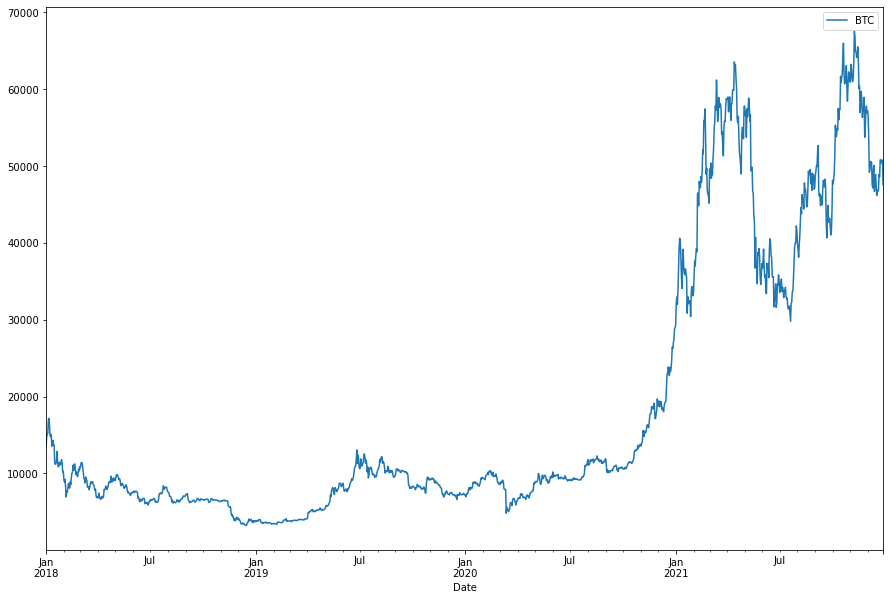

In [20]:
df['Close'].plot(figsize=(15,10), label='BTC')
plt.legend()
plt.show()

In [12]:
# Gerando média móvel de 9 e 21 dias.
MM9 = df['Close'].rolling(9).mean()
MM21 = df['Close'].rolling(21).mean()

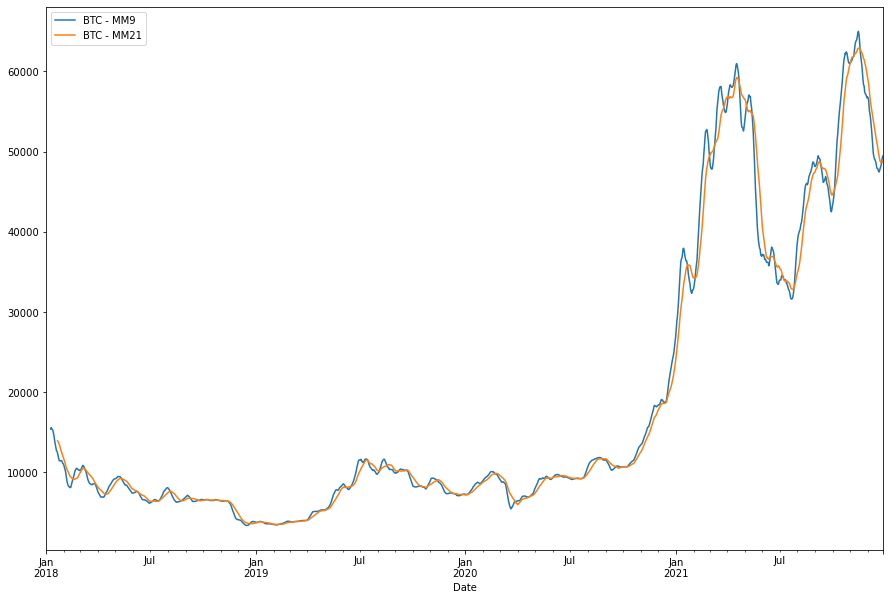

In [22]:
MM9.plot(figsize=(15,10), label='BTC - MM9')
MM21.plot(figsize=(15,10), label='BTC - MM21')
plt.legend()
plt.show()

In [23]:
df.describe()

,Open,High,Low,Close,Volume
count,1458.00000,1458.000000,1458.000000,1458.000000,1.458000e+03
mean,18275.57524,18789.453018,17698.001783,18298.533539,7.218630e+05
std,17710.57008,18215.953147,17131.948087,17726.650535,1.548713e+06
min,3228.60000,3282.300000,3177.000000,3228.700000,2.640000e+02
25%,7076.15000,7275.400000,6829.475000,7076.150000,1.163645e+05
50%,9427.85000,9667.300000,9233.050000,9430.750000,3.135425e+05
75%,26914.05000,28131.450000,26083.925000,27296.450000,6.970065e+05
max,67528.70000,68990.600000,66334.900000,67527.900000,2.025590e+07


# Data pre-processing

In [34]:
from sklearn.preprocessing import MinMaxScaler

# dimensionando cada recurso para um intervalo de 0 a 1.

MinMax = MinMaxScaler()

data = df.filter(['Close'])

data_MinMax = MinMax.fit_transform(data)

data_MinMax[0:10]

array([[0.15888534],
       [0.1792464 ],
       [0.1855062 ],
       [0.18587167],
       [0.21347233],
       [0.21685495],
       [0.20217203],
       [0.18270056],
       [0.17962587],
       [0.18373946]])

# Separating Data

In [36]:
x_train = []
y_train = []

# seprando em janelas de 30 dias. a ideia é treinar com uma janela e tentar prever a próxima! 
##################
window = 30 ######
##################
for i in range(window, len(data_MinMax)):
    
    X = data_MinMax[(i - window):i, 0]
    x_train.append(X)
    
    Y = data_MinMax[i, 0]
    y_train.append(Y)
    
X_train, Y_train = np.array(x_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_train.shape

(1428, 30, 1)

# Train LSTM

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import BinaryAccuracy, FalseNegatives
from tensorflow.keras.losses import BinaryCrossentropy

In [77]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(60, input_shape= (X_train.shape[1], 1)))
model.add(Dense(30))
model.add(Dense(1))
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_43 (LSTM)               (None, 60)                14880     
_________________________________________________________________
dense_46 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 31        
Total params: 16,741
Trainable params: 16,741
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.fit(X_train, Y_train, batch_size = 128, epochs = 20)

Train on 1428 samples
Epoch 1/20
1428/1428 [==============================] - 2s 1ms/sample - loss: 0.0360
Epoch 2/20
1428/1428 [==============================] - 0s 59us/sample - loss: 0.0036
Epoch 3/20
1428/1428 [==============================] - 0s 63us/sample - loss: 0.0013
Epoch 4/20
1428/1428 [==============================] - 0s 56us/sample - loss: 6.3700e-04
Epoch 5/20
1428/1428 [==============================] - 0s 56us/sample - loss: 5.3396e-04
Epoch 6/20
1428/1428 [==============================] - 0s 59us/sample - loss: 4.7384e-04
Epoch 7/20
1428/1428 [==============================] - 0s 53us/sample - loss: 4.2897e-04
Epoch 8/20
1428/1428 [==============================] - 0s 56us/sample - loss: 4.4441e-04
Epoch 9/20
1428/1428 [==============================] - 0s 49us/sample - loss: 4.1599e-04
Epoch 10/20
1428/1428 [==============================] - 0s 57us/sample - loss: 4.0091e-04
Epoch 11/20
1428/1428 [==============================] - 0s 55us/sample - loss: 3.9854e-04

# Predictions

In [93]:
import math

data_close = math.ceil( len(data) * .90)

data_close

1313

In [94]:
data_test = data_MinMax[data_close - window : , :]

x_test = []

y_test = data_MinMax[data_close: , :]

for i in range(window, len(data_test)):
    x_test.append(data_test[i - window: i, 0])
    
x_test = np.array(x_test)
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

prev = model.predict(X_test)

def RootMeanSquaredError(prev, y_test):
    rsme = np.sqrt(np.mean(prev - y_test)**2)
    return rsme

rsme = RootMeanSquaredError(prev, y_test)
print(rsme)
# inverse transforme MinMax
predictions = MinMax.inverse_transform(prev)

0.003230438287377347


# Predictions plot

In [98]:
val = data_train[data_close:]

val['Predictions'] = predictions

C:\Users\zlope\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [99]:
val

,Close,Predictions
Date,,
2021-08-06,42795.4,40609.871094
2021-08-07,44614.2,41766.703125
2021-08-08,43792.8,43313.183594
2021-08-09,46284.3,44015.363281
2021-08-10,45593.8,45380.789062
...,...,...
2021-12-24,50786.1,49692.292969
2021-12-25,50406.4,50503.535156
2021-12-26,50779.9,50836.265625


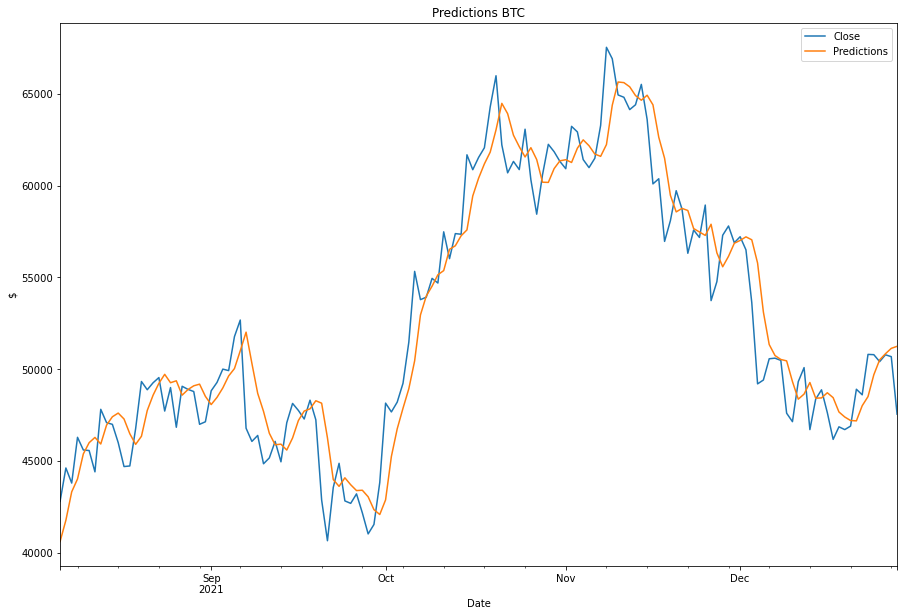

In [103]:
val.plot(figsize=(15,10))
plt.title('Predictions BTC')
plt.ylabel('$')
plt.savefig('predictions_BTC.jpg')
plt.show()